In [4]:
library(tidyverse)
library(ggplot2)

In [37]:
file <- read_csv("http://data.insideairbnb.com/canada/qc/quebec-city/2019-11-07/data/listings.csv.gz")

airbnb_df <- subset(file, select = -c(summary, space, description, scrape_id, last_scraped, 
                                      experiences_offered, thumbnail_url, medium_url, xl_picture_url, 
                                      host_acceptance_rate, name, neighbourhood, neighborhood_overview, 
                                      neighbourhood_group_cleansed, license, notes, transit, access, 
                                      interaction, house_rules, picture_url, host_about, host_thumbnail_url, 
                                      host_picture_url))

#removing '$' from price and fees and converting from string to numeric
airbnb_df$price = as.numeric(gsub("\\$", "", airbnb_df$price)) 
airbnb_df$weekly_price = as.numeric(gsub("\\$", "", airbnb_df$weekly_price))
airbnb_df$monthly_price = as.numeric(gsub("\\$", "", airbnb_df$monthly_price))
airbnb_df$cleaning_fee = as.numeric(gsub("\\$", "", airbnb_df$cleaning_fee))
airbnb_df$security_deposit = as.numeric(gsub("\\$", "", airbnb_df$security_deposit))

Parsed with column specification:
cols(
  .default = col_character(),
  id = col_double(),
  scrape_id = col_double(),
  last_scraped = col_date(format = ""),
  thumbnail_url = col_logical(),
  medium_url = col_logical(),
  xl_picture_url = col_logical(),
  host_id = col_double(),
  host_since = col_date(format = ""),
  host_is_superhost = col_logical(),
  host_listings_count = col_double(),
  host_total_listings_count = col_double(),
  host_has_profile_pic = col_logical(),
  host_identity_verified = col_logical(),
  neighbourhood = col_logical(),
  neighbourhood_group_cleansed = col_logical(),
  latitude = col_double(),
  longitude = col_double(),
  is_location_exact = col_logical(),
  accommodates = col_double(),
  bathrooms = col_double()
  # ... with 40 more columns
)

See spec(...) for full column specifications.

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in 

In [38]:
#finding the names of all columns and their data type
sapply(airbnb_df, class)

id 
                                   "numeric" 
                                 listing_url 
                                 "character" 
                                     host_id 
                                   "numeric" 
                                    host_url 
                                 "character" 
                                   host_name 
                                 "character" 
                                  host_since 
                                      "Date" 
                               host_location 
                                 "character" 
                          host_response_time 
                                 "character" 
                          host_response_rate 
                                 "character" 
                           host_is_superhost 
                                   "logical" 
                          host_neighbourhood 
                                 "character" 
                         host_listings_count 
                                   "numeric" 
                   host_total_listings_count 
                                   "numeric" 
                          host_verifications 
                                 "character" 
                        host_has_profile_pic 
                                   "logical" 
                      host_identity_verified 
                                   "logical" 
                                      street 
                                 "character" 
                      neighbourhood_cleansed 
                                 "character" 
                                        city 
                                 "character" 
                                       state 
                                 "character" 
                                     zipcode 
                                 "character" 
                                      market 
                                 "character" 
                              smart_location 
                                 "character" 
                                country_code 
                                 "character" 
                                     country 
                                 "character" 
                                    latitude 
                                   "numeric" 
                                   longitude 
                                   "numeric" 
                           is_location_exact 
                                   "logical" 
                               property_type 
                                 "character" 
                                   room_type 
                                 "character" 
                                accommodates 
                                   "numeric" 
                                   bathrooms 
                                   "numeric" 
                                    bedrooms 
                                   "numeric" 
                                        beds 
                                   "numeric" 
                                    bed_type 
                                 "character" 
                                   amenities 
                                 "character" 
                                 square_feet 
                                   "numeric" 
                                       price 
                                   "numeric" 
                                weekly_price 
                                   "numeric" 
                               monthly_price 
                                   "numeric" 
                            security_deposit 
                                   "numeric" 
                                cleaning_fee 
                                   "numeric" 
                             guests_included 
                                   "numeric" 
                                extra_people 
                                 "charac

Warning message:
"Removed 383 rows containing missing values (geom_point)."


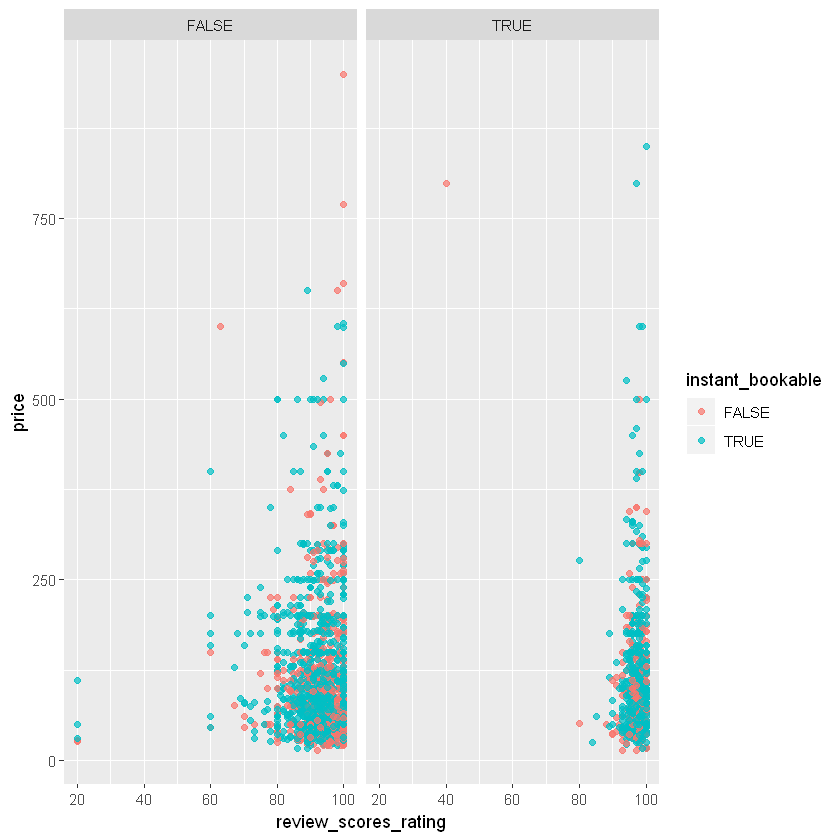

In [26]:
#not our figure --- just playing around with variables
ggplot(data = airbnb_df) + 
geom_point(aes(x = review_scores_rating, y = price, color = instant_bookable), alpha = 0.7) +
facet_grid(cols = vars(host_is_superhost))